In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from statsmodels.graphics.gofplots import qqplot

## Hipótesis inicial:
#### ***Las palabras utilizadas tienen gran relación con la intención dle mensaje, si se usan palabras como "costs", "stuck", "Obama" el mensaje será de ataque; mientras qeu al usar palabras más "amables" como "please", "join", "great" el mensaje será de apoyo. Además, el sesgo tendrá infleuncia, si es partidario será de ataque, y al ser neutral tendera a ser de apoyo***

In [2]:
df = pd.read_csv('../data/clean_political_social_media.csv')
df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,language_name,cantidad_arrobas,cantidad_hashtag,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,85,Senator,English,0,1,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,136,Representative,English,0,0,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,139,Representative,English,0,2,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,110,Representative,English,0,0,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,128,Representative,English,1,1,...,0,0,0,0,0,0,0,0,0,0


### Observamos cual es la proporción de los tipos/intenciones de mensajes

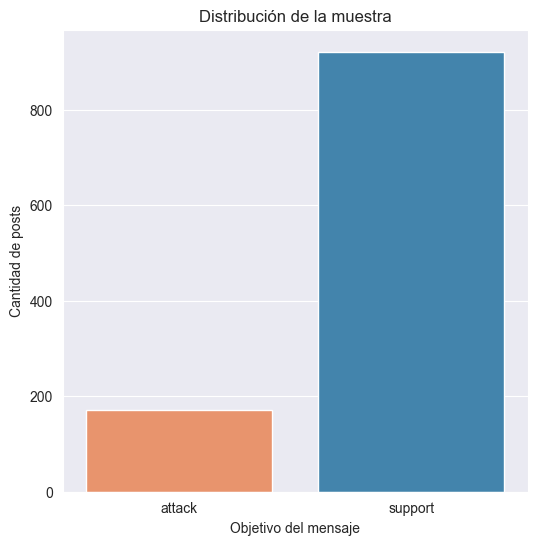

Porcentajes de posts de apoyo en la muestra: 84.26349496797805
Porcentajes de posts de ataque en la muestra: 15.736505032021958


In [3]:
rcParams['figure.figsize'] = 6,6
paleta = ["#fc8d59","#3288bd"]

df['message'].value_counts()
sns.countplot(x='message', data=df, palette=paleta)
plt.xlabel("Objetivo del mensaje")
plt.ylabel("Cantidad de posts")
plt.title("Distribución de la muestra")
plt.show()

attack = len(df[df['message']=='attack'])
support = len(df[df['message']=='support'])
ataque_porciento =( attack / (attack + support) * 100)
apoyo_porciento= (support / (attack + support) * 100)
print('Porcentajes de posts de apoyo en la muestra:', apoyo_porciento)
print('Porcentajes de posts de ataque en la muestra:', ataque_porciento)

Como podemos ver, no es un 50/50. Esto se va a tener en cuenta más adelante, para mantener esta proporción

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unit_id              1093 non-null   int64  
 1   audience             1093 non-null   float64
 2   bias                 1093 non-null   float64
 3   message              1093 non-null   int64  
 4   source               1093 non-null   float64
 5   cantidad_caracteres  1093 non-null   float64
 6   cargo                1093 non-null   float64
 7   cantidad_arrobas     1093 non-null   float64
 8   cantidad_hashtag     1093 non-null   float64
 9   tiene_obama          1093 non-null   int64  
 10  tiene_obamacare      1093 non-null   int64  
 11  tiene_costs          1093 non-null   int64  
 12  tiene_venezuela      1093 non-null   int64  
 13  tiene_demandar       1093 non-null   int64  
 14  tiene_remember       1093 non-null   int64  
 15  tiene_stuck          1093 non-null   i

# 1- Escalado

#### Identifico cuales son las variables númericas que requieren ser escaladas

In [5]:
numericas = df.select_dtypes(exclude=['object']).columns
numericas

Index(['unit_id', 'cantidad_caracteres', 'cantidad_arrobas',
       'cantidad_hashtag', 'tiene_obama', 'tiene_obamacare', 'tiene_costs',
       'tiene_venezuela', 'tiene_demandar', 'tiene_remember', 'tiene_stuck',
       'tiene_higher', 'tiene_spawning', 'tiene_please', 'tiene_join',
       'tiene_great', 'tiene_vote', 'tiene_share', 'tiene_applaud',
       'tiene_clinton'],
      dtype='object')

Lo que se hará es primero observar como es su distribución, y si hay outliers, mediante lso gráficos; y luego se aplicara el escalado correspondiente.

## Cantidad de caracteres

<AxesSubplot: title={'center': 'Boxplot decantidad_caracteres'}, xlabel='cantidad_caracteres'>

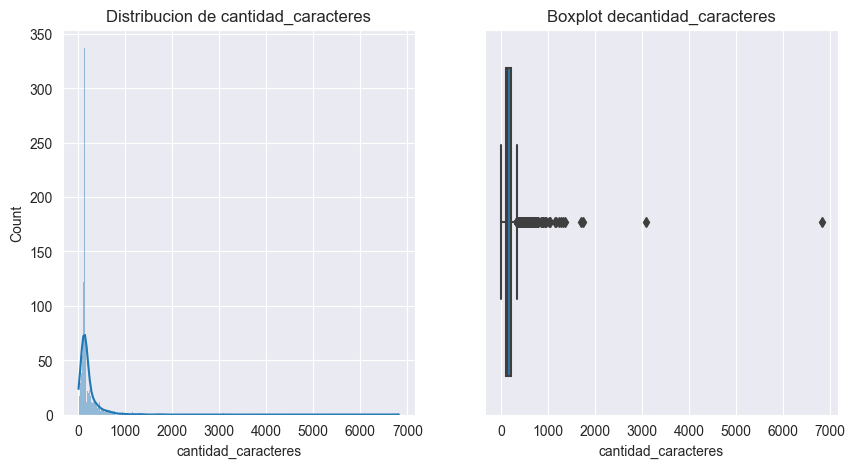

In [6]:
variable = 'cantidad_caracteres'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

Podemos observar, que parecería ser una distribución normal, pero con outliers. Por lo tanto, realizamos un escalamiento robusto.

In [7]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
df['cantidad_caracteres'] = rb_scaler.fit_transform(df[['cantidad_caracteres']])
df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,language_name,cantidad_arrobas,cantidad_hashtag,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,-0.602273,Senator,English,0,1,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,-0.022727,Representative,English,0,0,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,0.011364,Representative,English,0,2,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,-0.318182,Representative,English,0,0,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,-0.113636,Representative,English,1,1,...,0,0,0,0,0,0,0,0,0,0


## Cantidad arrobas

<AxesSubplot: title={'center': 'Boxplot decantidad_arrobas'}, xlabel='cantidad_arrobas'>

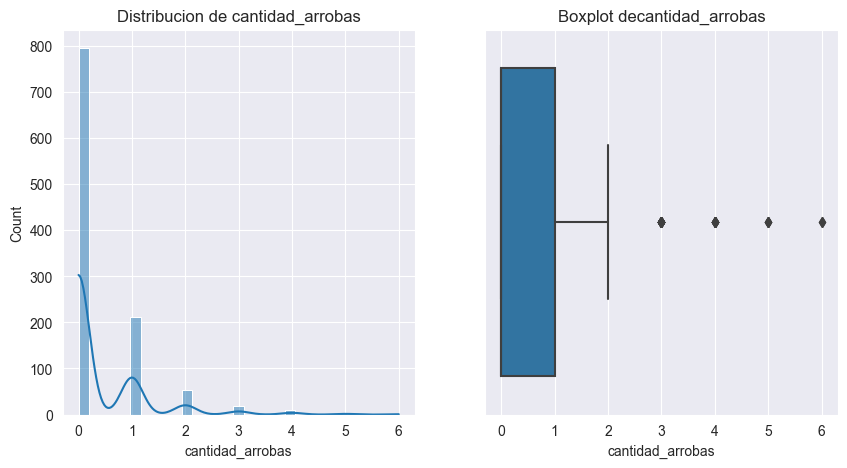

In [9]:
variable = 'cantidad_arrobas'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

Al no ser una distribución normal, y además vemos que tiene outliers, se realizará un escalamiento de minimo-máximo

In [10]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

df['cantidad_arrobas']= minmaxscaler.fit_transform(df[['cantidad_arrobas']])

df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,language_name,cantidad_arrobas,cantidad_hashtag,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,-0.602273,Senator,English,0.000000,1,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,-0.022727,Representative,English,0.000000,0,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,0.011364,Representative,English,0.000000,2,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,-0.318182,Representative,English,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,-0.113636,Representative,English,0.166667,1,...,0,0,0,0,0,0,0,0,0,0


## Cantidad hashtag

<AxesSubplot: title={'center': 'Boxplot decantidad_hashtag'}, xlabel='cantidad_hashtag'>

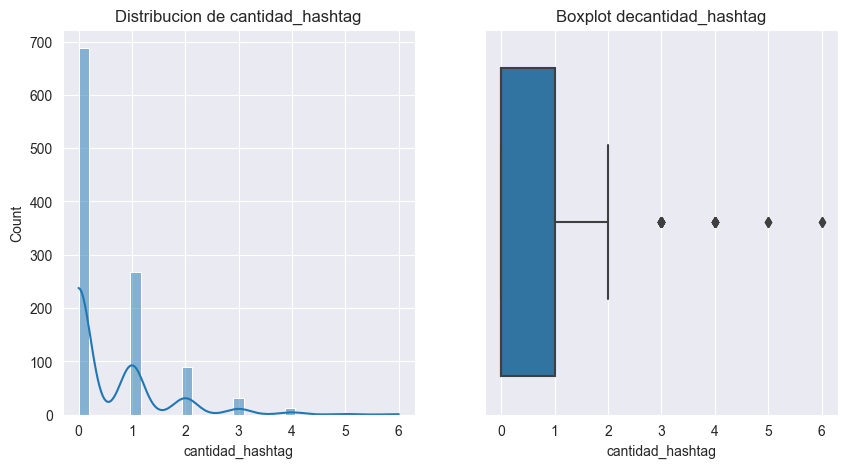

In [11]:
variable = 'cantidad_hashtag'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

Esta es la misa situación de la anterior variable, por lo que tambien aplicamos un escalamiento minimo-máximo

In [12]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

df['cantidad_hashtag']= minmaxscaler.fit_transform(df[['cantidad_hashtag']])

df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,language_name,cantidad_arrobas,cantidad_hashtag,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,-0.602273,Senator,English,0.000000,0.166667,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,-0.022727,Representative,English,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,0.011364,Representative,English,0.000000,0.333333,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,-0.318182,Representative,English,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,-0.113636,Representative,English,0.166667,0.166667,...,0,0,0,0,0,0,0,0,0,0


## Variables de: 0 y 1 :"tiene ..."

Al ser siempre solo estas dos variables, siendo un si/no, no hace falta que se escalen.

# 3- Encoding de vairbales categroicas

#### ¿Cuales son las variables categóricas?

In [13]:
categoricas = df.select_dtypes(exclude=['float', 'integer']).columns
categoricas

Index(['audience', 'bias', 'message', 'source', 'cargo', 'language_name'], dtype='object')

#### Revisamos, como se conforman las variables

In [14]:
print(f"Los valores unicos de audience son {df.audience.unique()}")
print(f"Los valores unicos de bias son {df.bias.unique()}")
print(f"Los valores unicos de source son {df.source.unique()}")
print(f"Los valores unicos de cargo son {df.cargo.unique()}")
print(f"Los valores unicos de language son {df.language_name.unique()}")

Los valores unicos de audience son ['national' 'constituency']
Los valores unicos de bias son ['partisan' 'neutral']
Los valores unicos de source son ['twitter' 'facebook']
Los valores unicos de cargo son ['Senator' 'Representative']
Los valores unicos de language son ['English' 'Spanish , Castilian' 'Desconocido']


### Audience, bias, source, cargo
Debido al hecho de que estas variables, solo cuentan con dos categóricas, se aplica un encoding binario, con el OneHotEncoder.

In [15]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
df['audience'] = binary_encoder.fit_transform(df[['audience']])
df['bias'] = binary_encoder.fit_transform(df[['bias']])
df['source'] = binary_encoder.fit_transform(df[['source']])
df['cargo'] = binary_encoder.fit_transform(df[['cargo']])

df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,language_name,cantidad_arrobas,cantidad_hashtag,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,1.0,1.0,attack,1.0,-0.602273,1.0,English,0.000000,0.166667,...,0,1,0,0,0,0,0,0,0,0
1,766192486,1.0,0.0,support,1.0,-0.022727,0.0,English,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
2,766192493,1.0,1.0,support,1.0,0.011364,0.0,English,0.000000,0.333333,...,0,0,0,0,0,1,0,0,0,1
3,766192495,1.0,1.0,attack,1.0,-0.318182,0.0,English,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,766192501,1.0,0.0,support,1.0,-0.113636,0.0,English,0.166667,0.166667,...,0,0,0,0,0,0,0,0,0,0


### Language_name

En este caso como son 3 categorías, también se utiliza OneHotEncoder, pero no "if_binary". Se crearán nuevas columnas ocn las categorías, que diran si si (1) o no (0) corresponde a ese registro

In [16]:
from sklearn.preprocessing import OneHotEncoder

language_ohe = OneHotEncoder(sparse=False)

language_ohe.fit(df[['language_name']])

language_ohe.categories_

[array(['Desconocido', 'English', 'Spanish , Castilian'], dtype=object)]

In [17]:
from sklearn.preprocessing import OneHotEncoder

language_ohe = OneHotEncoder(sparse=False)

df['Desconocido'],df['English'],df['Spanish , Castilian']  = language_ohe.fit_transform(df[['language_name']]).T

df.drop(columns=['language_name'], inplace = True)

df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,cantidad_arrobas,cantidad_hashtag,tiene_obama,...,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton,Desconocido,English,"Spanish , Castilian"
0,766192485,1.0,1.0,attack,1.0,-0.602273,1.0,0.000000,0.166667,1,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,766192486,1.0,0.0,support,1.0,-0.022727,0.0,0.000000,0.000000,0,...,1,1,0,0,0,0,0,0.0,1.0,0.0
2,766192493,1.0,1.0,support,1.0,0.011364,0.0,0.000000,0.333333,0,...,0,0,1,0,0,0,1,0.0,1.0,0.0
3,766192495,1.0,1.0,attack,1.0,-0.318182,0.0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,766192501,1.0,0.0,support,1.0,-0.113636,0.0,0.166667,0.166667,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0


## Encoding de la variable target: _message_

Al ser esta la variable target, a la que se quiere llegar, se utiliza LabelEncoder. Que funciona también de manera binaria, 0 y 1, para las dos categorías.

In [18]:
print(f"Los valores unicos de audience son {df.message.unique()}")

Los valores unicos de audience son ['attack' 'support']


In [19]:
from sklearn.preprocessing import LabelEncoder

df['message'] = LabelEncoder().fit_transform(df['message'])
df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,cargo,cantidad_arrobas,cantidad_hashtag,tiene_obama,...,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton,Desconocido,English,"Spanish , Castilian"
0,766192485,1.0,1.0,0,1.0,-0.602273,1.0,0.000000,0.166667,1,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,766192486,1.0,0.0,1,1.0,-0.022727,0.0,0.000000,0.000000,0,...,1,1,0,0,0,0,0,0.0,1.0,0.0
2,766192493,1.0,1.0,1,1.0,0.011364,0.0,0.000000,0.333333,0,...,0,0,1,0,0,0,1,0.0,1.0,0.0
3,766192495,1.0,1.0,0,1.0,-0.318182,0.0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,766192501,1.0,0.0,1,1.0,-0.113636,0.0,0.166667,0.166667,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0


# 4- Arbol de decisión

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X =df.drop(columns=['message', 'unit_id'])
y = df['message']

Separamos entre los datos que se usarán para entrenar y para testear, fundamental estratificar y. Para ello se usa el stratify.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.30)

In [23]:
from sklearn.tree import DecisionTreeClassifier

### Primer intento
Sin ninguna restricción, ni criterio (utiliza gini por ser el automático)

In [25]:
dtree = DecisionTreeClassifier()
dtree= dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8262195121951219


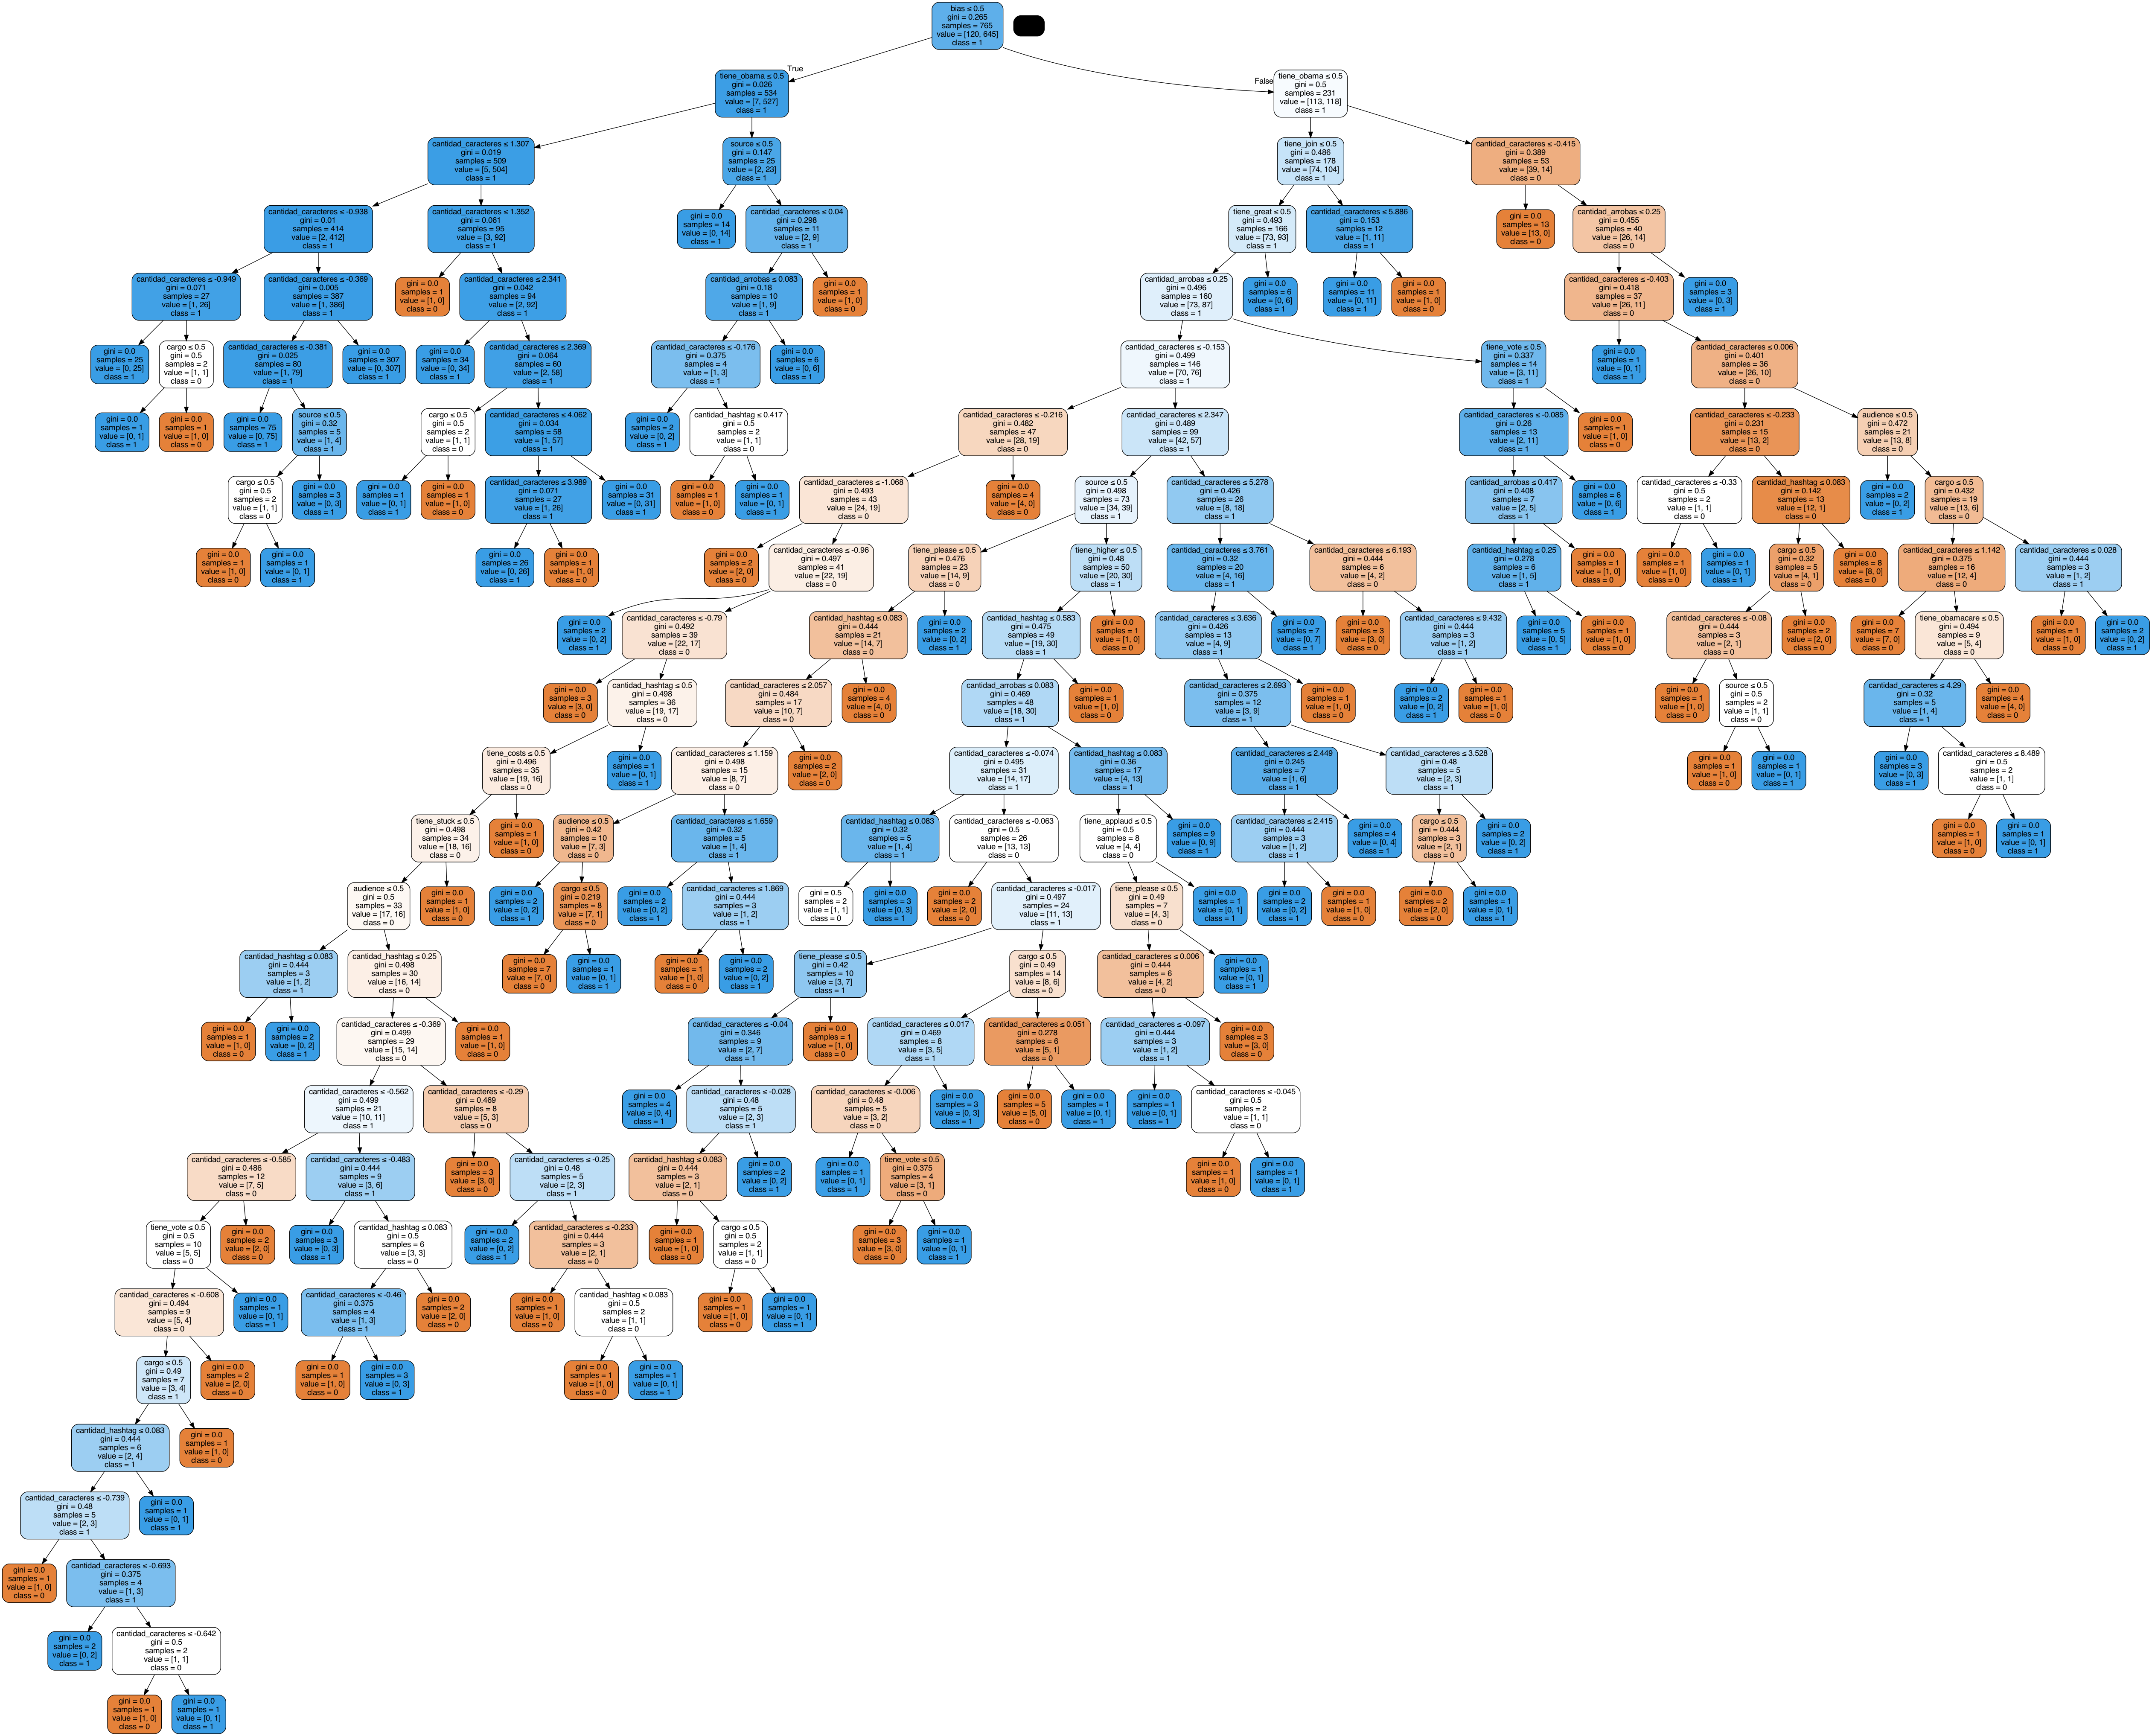

In [26]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../dtree_graphs/dtree_posts_1.png')
Image(graph.create_png())

# Mejorando el arbol de decision

#### Primer mejora
Se mejoró, aclarando el criterio(aunque es el mismo que es el anterior), y se agregó un máximo (3) de niveles
El criterio de gini mide la frecuencia en la que los elementos del dataset serán mal etiquetados cuando son etiquetados al azar. EL minimo es 0, lo que significa que el nodo es puro, es decir que los elementos adentro son todos de na clase, por lo que no se volverá a dividir el nodo. El máximo posible es 0.5
Solo tomando max_depth, 3 es en el que se obtuvo el accuracy más alto

In [ ]:
dtree = DecisionTreeClassifier(criterion="gini", max_depth=3)

dtree = dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

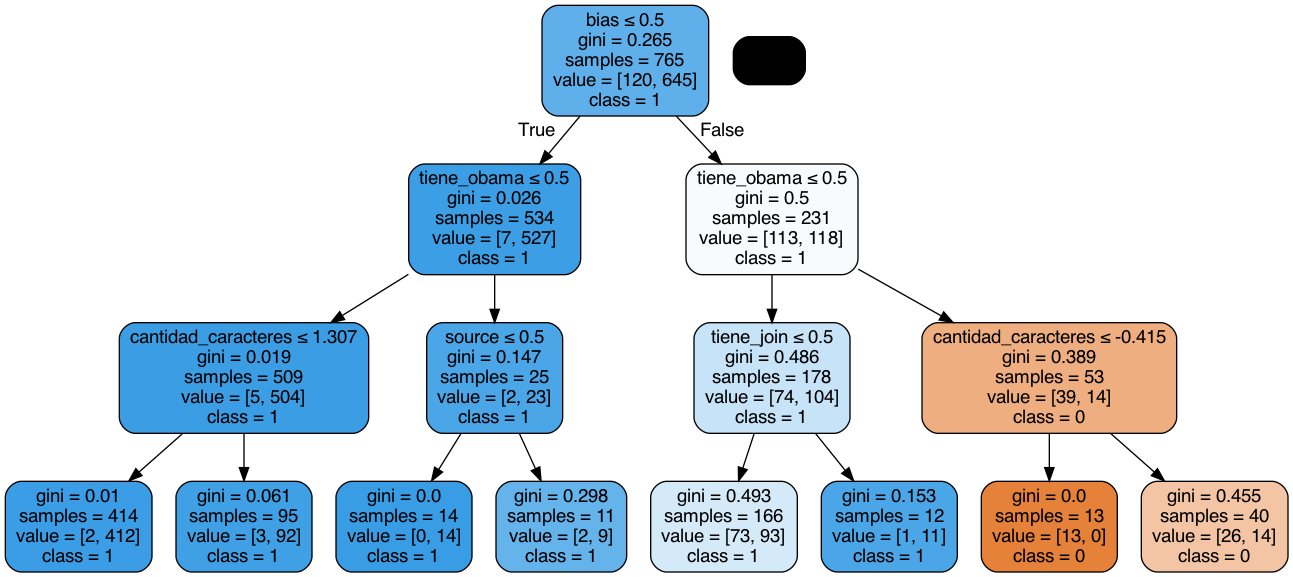

In [38]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../dtree_graphs/dtree_posts_2.png')
Image(graph.create_png())

### Segunda mejora
Se cambió el criterio a entropy. Este indica el desorden de las variables con el target, lo más óptimo es cuanto menor es el número. Llega a su valor máximo (1) cuando la probabilidad de las dos clases es la misma.
Y el máximo de nivel en el arbol, se cambió a 2 que es donde se encontró el máximo accuracy.

In [43]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=2)

dtree = dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8628048780487805


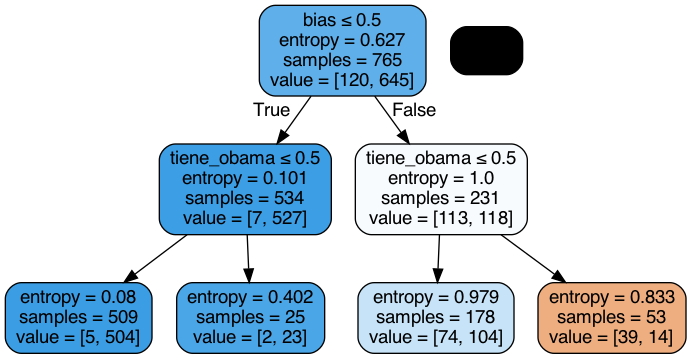

In [46]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../dtree_graphs/dtree_posts_3.png')
Image(graph.create_png())

### Tercer mejora

min_samples_leaf: (default = 1) the minimum number of samples required for a leaf node. A split will only occur if the nodes that result from the split meet this minimum. This can be especially useful in regression trees.

In [55]:
dtree = DecisionTreeClassifier(criterion='gini',
                               min_samples_leaf=5,
                               max_depth=4)

dtree = dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8689024390243902


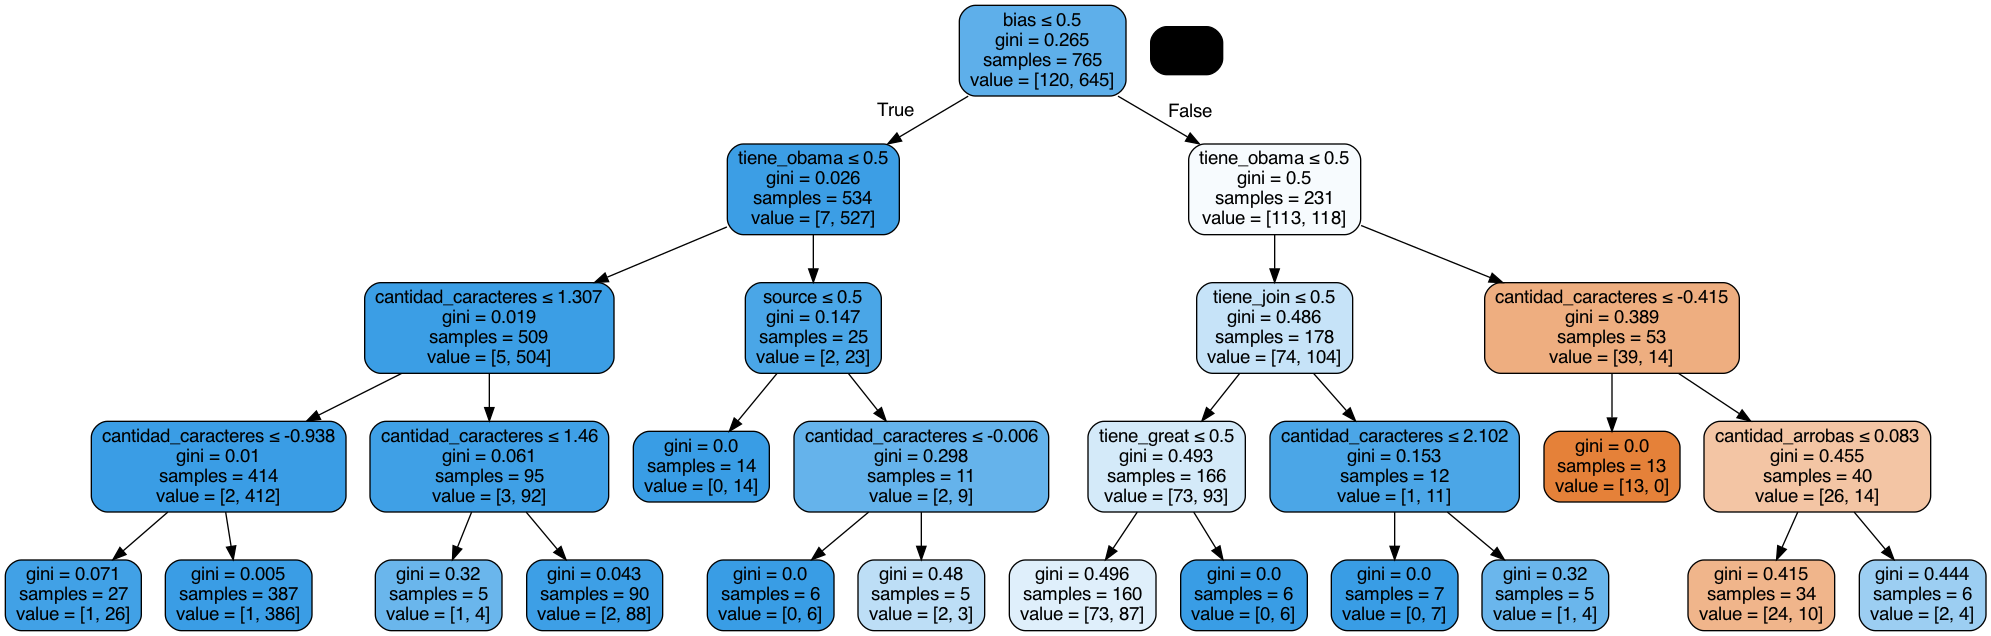

In [56]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../dtree_graphs/dtree_posts_4.png')
Image(graph.create_png())

min_samples_split: (default = 2) the minimum number of samples in an internal node that allows for a split to occur. If a node has less than this number if becomes a leaf (terminal node).


In [61]:
dtree = DecisionTreeClassifier(criterion='entropy',
                               min_samples_leaf=5,
                               min_samples_split=5,
                               max_depth=4)
# Train Decision Tree Classifer
dtree = dtree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8689024390243902


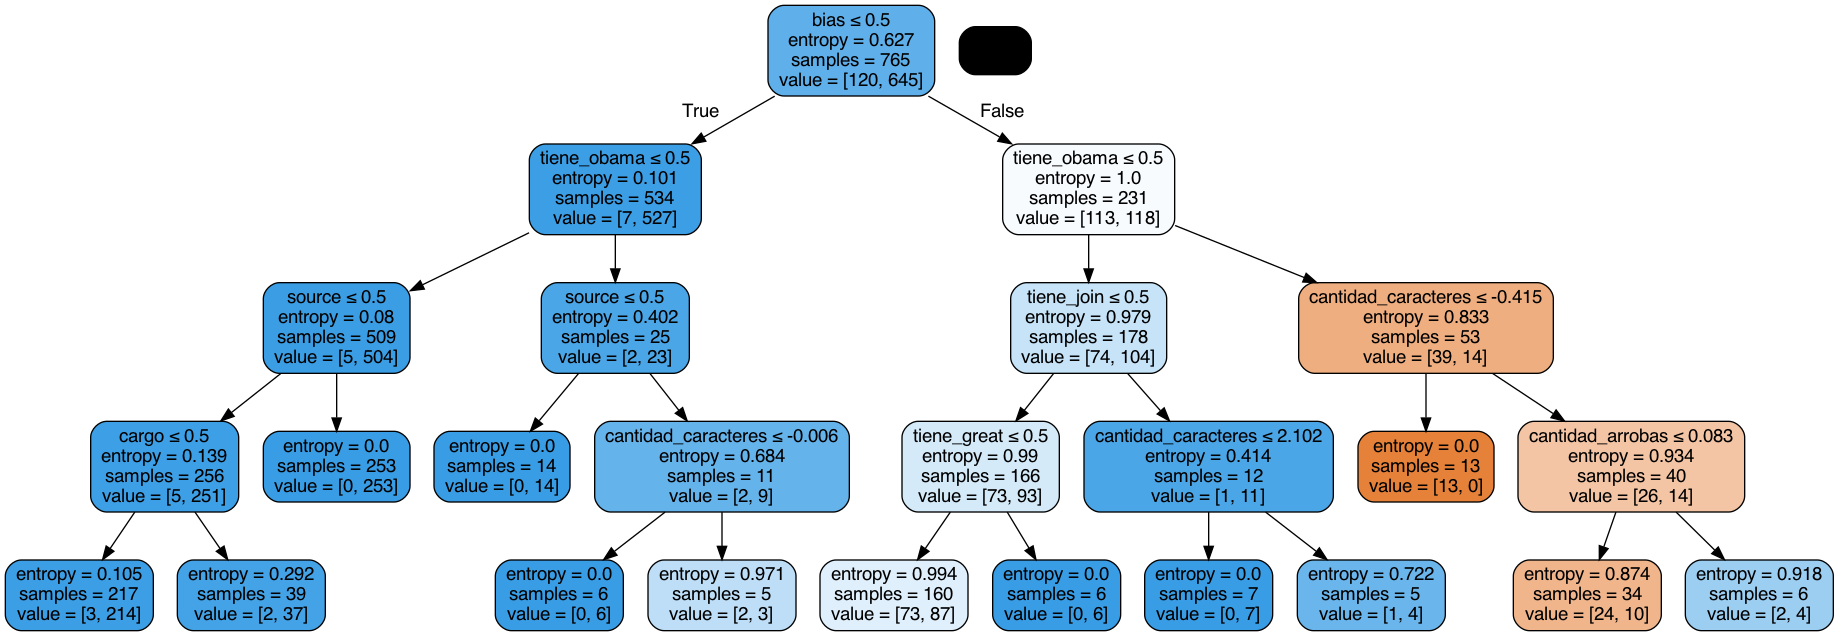

In [62]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../dtree_graphs/dtree_posts_5.png')
Image(graph.create_png())

# 5- Evaluación del modelo

In [74]:
from sklearn.inspection import permutation_importance

model = DecisionTreeClassifier().fit(X,y)
permutation_score = permutation_importance(model, X, y, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T,
                            columns = ['feature','feature_importance'])

print("Despues de la permutacion de variables, asi decrece el score en terminos de variables:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False)
importance_df

Despues de la permutacion de variables, asi decrece el score en terminos de variables:


,feature,feature_importance
1,bias,0.186578
3,cantidad_caracteres,0.147429
7,tiene_obama,0.050082
6,cantidad_hashtag,0.046057
5,cantidad_arrobas,0.035005
2,source,0.033449
4,cargo,0.024712
0,audience,0.015709
16,tiene_please,0.007823
19,tiene_vote,0.005627


In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
y_test.value_counts()

1    276
0     52
Name: message, dtype: int64

In [64]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 20  32]
 [ 11 265]]


In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.38      0.48        52
           1       0.89      0.96      0.92       276

    accuracy                           0.87       328
   macro avg       0.77      0.67      0.70       328
weighted avg       0.85      0.87      0.85       328



1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

Explicar variable smas importantes.
Evaluacion: amtriz de ocnfusion, metricas de precicion, recall y accuracy. ¿Es bueno el modelo? Que significa el error que tiene



# 6- Prediccion

Predecir una insatncia que no exista
Explcia es ainstabcia con palabras
Explciar resultaod ¿tiene sentido la hipotesis?

In [66]:
X.head()

,audience,bias,source,cantidad_caracteres,cargo,cantidad_arrobas,cantidad_hashtag,tiene_obama,tiene_obamacare,tiene_costs,...,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton,Desconocido,English,"Spanish , Castilian"
0,1.0,1.0,1.0,-0.602273,1.0,0.000000,0.166667,1,1,1,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,1.0,0.0,1.0,-0.022727,0.0,0.000000,0.000000,0,0,0,...,1,1,0,0,0,0,0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.011364,0.0,0.000000,0.333333,0,0,0,...,0,0,1,0,0,0,1,0.0,1.0,0.0
3,1.0,1.0,1.0,-0.318182,0.0,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,1.0,0.0,1.0,-0.113636,0.0,0.166667,0.166667,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0


In [67]:
prediction = dtree.predict([[0.0,1.0,0.0,-0.34,0.0,0.0,0.2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0]])[0]

prediction

/Users/Melimarkstein/.conda/envs/TP_final/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [68]:
probability = dtree.predict_proba([[0.0,1.0,0.0,-0.34,0.0,0.0,0.2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0]])[0][1]

probability

/Users/Melimarkstein/.conda/envs/TP_final/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.29411764705882354

esto es attack

# 7- Conclusión

Conclusion final ¿se cumple hipotesis?